In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV



In [81]:
df = pd.read_csv('E-Commerce WALMART [RF]/walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [82]:
df.shape

(550068, 10)

In [83]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [84]:
df['Gender'] = df['Gender'].map({'M':0,'F':1})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,15200
2,1000001,P00087842,1,0-17,10,A,2,0,12,1422
3,1000001,P00085442,1,0-17,10,A,2,0,12,1057
4,1000002,P00285442,0,55+,16,C,4+,0,8,7969


In [85]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [86]:
df['Age'] = df['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3, '46-50':4,'51-55':5,'55+':6})
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,1,0,10,A,2,0,3,8370
1,1000001,P00248942,1,0,10,A,2,0,1,15200
2,1000001,P00087842,1,0,10,A,2,0,12,1422
3,1000001,P00085442,1,0,10,A,2,0,12,1057
4,1000002,P00285442,0,6,16,C,4+,0,8,7969
5,1000003,P00193542,0,2,15,A,3,0,1,15227
6,1000004,P00184942,0,4,7,B,2,1,1,19215
7,1000004,P00346142,0,4,7,B,2,1,1,15854
8,1000004,P0097242,0,4,7,B,2,1,1,15686
9,1000005,P00274942,0,2,20,A,1,1,8,7871


In [87]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace({'4+':4})
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,1,0,10,A,2,0,3,8370
1,1000001,P00248942,1,0,10,A,2,0,1,15200
2,1000001,P00087842,1,0,10,A,2,0,12,1422
3,1000001,P00085442,1,0,10,A,2,0,12,1057
4,1000002,P00285442,0,6,16,C,4,0,8,7969
5,1000003,P00193542,0,2,15,A,3,0,1,15227
6,1000004,P00184942,0,4,7,B,2,1,1,19215
7,1000004,P00346142,0,4,7,B,2,1,1,15854
8,1000004,P0097242,0,4,7,B,2,1,1,15686
9,1000005,P00274942,0,2,20,A,1,1,8,7871


In [88]:
df[['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
    'Marital_Status', 'Product_Category','Purchase']] = df[['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
    'Marital_Status', 'Product_Category','Purchase']].astype('int')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int64 
 3   Age                         550068 non-null  int64 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 42.0+ MB


In [90]:
df['Marital_Status'] = df['Marital_Status'].astype(bool)
df['Purchase'] = df['Purchase'].astype(float)

In [91]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['City_Category'] = le.fit_transform(df['City_Category'])
df['Product_ID'] = le.fit_transform(df['Product_ID'])

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,672,1,0,10,0,2,False,3,8370.0
1,1000001,2376,1,0,10,0,2,False,1,15200.0
2,1000001,852,1,0,10,0,2,False,12,1422.0
3,1000001,828,1,0,10,0,2,False,12,1057.0
4,1000002,2734,0,6,16,2,4,False,8,7969.0


In [92]:
df['City_Category'] = df['City_Category'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  bool   
 8   Product_Category            550068 non-null  int64  
 9   Purchase                    550068 non-null  float64
dtypes: bool(1), float64(1), int64(8)
memory usage: 38.3 MB


In [93]:
df = df.drop(['User_ID'], axis=1)
df.head(1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,672,1,0,10,0,2,False,3,8370.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  int64  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  bool   
 7   Product_Category            550068 non-null  int64  
 8   Purchase                    550068 non-null  float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 34.1 MB


In [95]:
#correlacion
corr = df.drop(['Product_ID'], axis=1).corr()
corr

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
Gender,1.000000,0.004262,-0.117291,0.004515,-0.014660,0.011603,0.045594,-0.060346
Age,0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.015839
Occupation,-0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.020833
City_Category,0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.061914
Stay_In_Current_City_Years,-0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.005422
Marital_Status,0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,-0.000463
Product_Category,0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.343703
Purchase,-0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,1.000000


<Axes: >

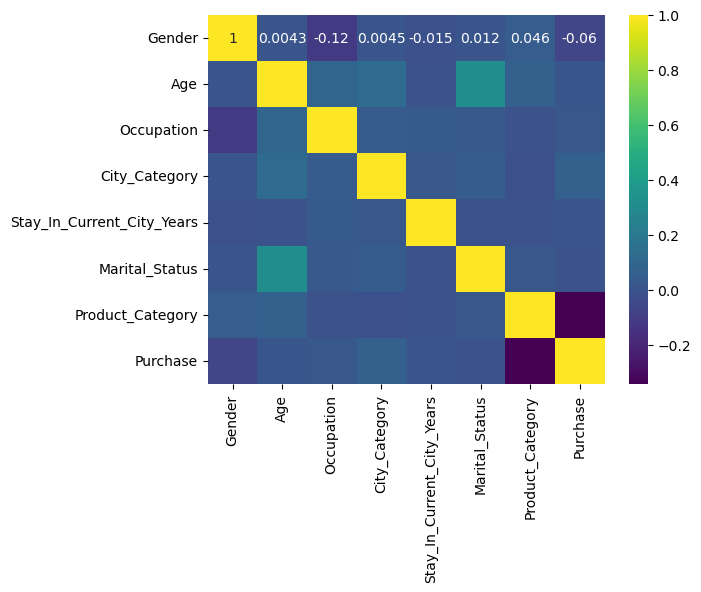

In [96]:
sns.heatmap(corr, annot=True, cmap='viridis')
#

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Seleccionar solo columnas numéricas
numerical_columns = df.select_dtypes(include=['number'])

# Ajustar y transformar el DataFrame
df[numerical_columns.columns] = scaler.fit_transform(numerical_columns)


In [98]:
df.head(1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,-1.022993,1.746513,-1.844248,0.294864,-1.371516,0.109801,False,-0.610809,-0.177973


In [99]:
X = df.drop(['Purchase'], axis=1)
y = df['Purchase']


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
#Model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=1)

In [102]:
#pred
y_pred = model.predict(X_test)


In [103]:
# metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



Mean Absolute Error (MAE): 0.42
Mean Squared Error (MSE): 0.33
R-squared (R²): 0.67


In [104]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6663288647756955
